# Module-5 Unsupervised Clustering
- K-Means Clustering
- Hierachical Clustering
- Parameters: Distance Measures,No.of Clusters,Elbow method

# Unsupervised Clustering

- Unsupervised learning is when the model is getting trained on an unlabeled dataset, it is up to the algorithm to find underlying patterns in data.

- Unsupervised Clustering : Clustering is the task of dividing the population or data points into several groups, such that data points in a group are homogenous to each other than those in different groups. 

- Few unsupervised clustering are - K-means clustering algorithms, hierarchal clustering etc.

# K-Means Clustering:

- this is an unsupervised clustering model.
- it groups the given points with no explicit labeling for the data points given.
- this cluster identifies and groups similar data points.
- Steps:
    - Step 1: Choose the number of clusters.
    - Step 2: Select at random K points , the centroids.
    - Step 3: Assign each data point to the closest centroid that forms k clusters.
    - Step 4: Compute and place the new centroids for each clusters.
    - Step 5: Reassign each data point to the closest centroid.If any reassignment took place go to Step 4 otherwise to go to Fin.

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=data.iloc[:,[3,4]].values

### 3. Taking care of missing data

In [4]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 4.Finding optimal number of clusters using Elbow method:

In [5]:
from sklearn.cluster import KMeans

#choosing the number of clusters
k =  10 

In [6]:
wcss=[]
for i in range (1,k+1):
    cluster=KMeans(n_clusters=i,random_state=2)
    cluster.fit(x)
    wcss.append(cluster.inertia_)

C:\Users\ANBU NAMBI\anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30552.714025467285,
 25022.485004530332,
 21830.04197804944,
 20064.59240151932]

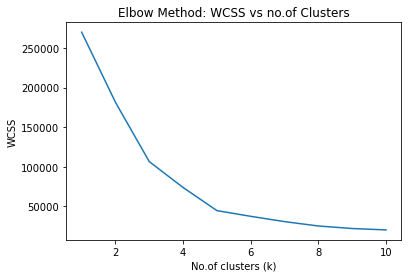

In [8]:
plt.plot(range(1,k+1),wcss)
plt.title("Elbow Method: WCSS vs no.of Clusters")
plt.xlabel("No.of clusters (k)")
plt.ylabel("WCSS")
plt.show()

### 5. Train the clustering model

In [9]:
optimal_no_of_clusters=5

In [10]:
kmeans=KMeans(n_clusters=optimal_no_of_clusters,random_state=2)

In [11]:
kmeans.fit(x)

KMeans(n_clusters=5, random_state=2)

In [12]:
y_pred=kmeans.predict(x)
y_pred

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

### 6.Visualise the cluster

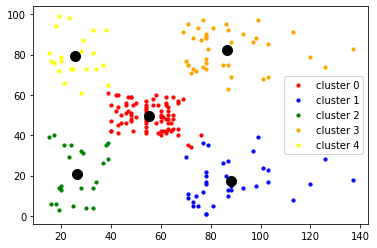

In [14]:
#k-means clustering:
#y_pred gives the cluster ie if no of clusters is 5 then it ranges from 0 to 4
#X[y_pred==0,0] denotes point for the cluster 0 wrt to the annual income column X[:,0]
#X[y_pred==0,1] denotes point for the cluster 0 wrt to the  spending score column X[:,1]

plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c="red",s=10, label ="cluster 0")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c="blue",s=10, label ="cluster 1")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c="green",s=10, label ="cluster 2")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c="orange",s=10, label ="cluster 3")
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c="yellow",s=10, label ="cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="black",s=100)
plt.legend()

In [15]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

# Hierarchial Clustering:

- This is an unsupervised clustering model.
- It  groups the unlabeled datasets into clusters
- In this, the hierarchy of clusters from a tree and this tree-shaped structures are called <b>"Dendrogram"</b>
-Dendrogram is mainly used to store each step as a memory that th ehc algorith performs.
-This had two approaches:
    - <b>bottom up approach (Agglomerative)</b> : This considers each data points as a single cluster initially and then start combining the closest pair of clusters together.
    - top-down approach

### 1. Import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import dataset

In [18]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
X=df.iloc[:,[3,4]].values

### 3. Taking care of missing data

In [20]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 4.Finding optimal number of clusters using the dendrogram:

In [21]:
import scipy.cluster.hierarchy as shc

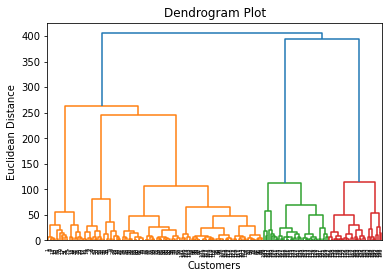

In [22]:
tree_cluster=shc.dendrogram(shc.linkage(X,method='ward'))
plt.title('Dendrogram Plot')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

### 5. Train the hierachical clustering model

In [23]:
from sklearn.cluster import AgglomerativeClustering as ac

hc = ac(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc=hc.fit_predict(X)

### 6.Visualise the cluster

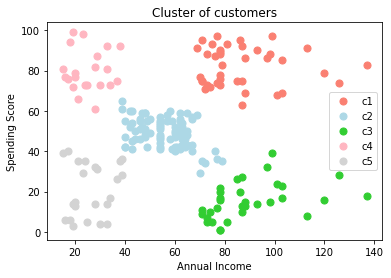

In [24]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],c="salmon",s=50, label ="c1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],c="lightblue",s=50, label ="c2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],c="limegreen",s=50, label ="c3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],c="lightpink",s=50, label ="c4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],c="lightgrey",s=50, label ="c5")
plt.title('Cluster of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()